# Tracking FII flows

Plots the Foreign Institutional Investment flows in/out of Indian capital markets.
Follows the documentation [here](https://github.com/shyams80/plutons/blob/master/docs-R/InvestmentFlowsIndia.ipynb)

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)
library(ggrepel)

options("scipen"=999)
options(stringsAsFactors = FALSE)
source("config.R")
source("goofy/plot.common.R")

#initialize
iflows <- InvestmentFlowsIndia()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from

In [2]:
fiiDebt <- iflows$FiiCashMarket() %>%
    filter(SECURITY_TYPE == 'Debt') %>%
    group_by(TIME_STAMP) %>%
    summarize(NET = sum(BUY_VALUE - SELL_VALUE)) %>%
    arrange(TIME_STAMP) %>%
    select(TIME_STAMP, NET) %>%
    collect() %>%
    as.data.frame()

fiiEquity <- iflows$FiiCashMarket() %>%
    filter(SECURITY_TYPE == 'Equity') %>%
    group_by(TIME_STAMP) %>%
    summarize(NET = sum(BUY_VALUE - SELL_VALUE)) %>%
    arrange(TIME_STAMP) %>%
    select(TIME_STAMP, NET) %>%
    collect() %>%
    as.data.frame()

fiiHybrid <- iflows$FiiCashMarket() %>%
    filter(SECURITY_TYPE == 'Hybrid') %>%
    group_by(TIME_STAMP) %>%
    summarize(NET = sum(BUY_VALUE - SELL_VALUE)) %>%
    arrange(TIME_STAMP) %>%
    select(TIME_STAMP, NET) %>%
    collect() %>%
    as.data.frame()


Warning message:
“Missing values are always removed in SQL.
Use `SUM(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”

### Debt flows

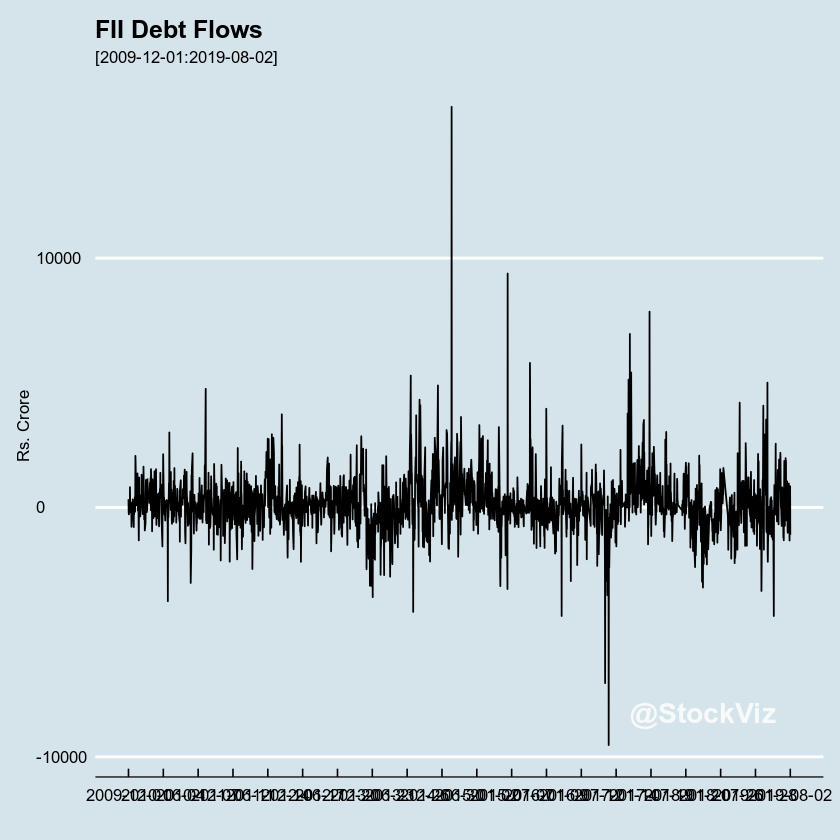

In [3]:
firstDate <- first(fiiDebt$TIME_STAMP)
lastDate <- last(fiiDebt$TIME_STAMP)
xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=20)

ggplot(fiiDebt, aes(x=TIME_STAMP, y=NET)) +
    theme_economist() +
    geom_line() +
    scale_x_date(breaks = xAxisTicks) +
    labs(x='', y='Rs. Crore', color='', title="FII Debt Flows", 
         subtitle=sprintf("[%s:%s]", firstDate, lastDate)) +
    annotate("text", x=lastDate, y=min(fiiDebt$NET, na.rm=T), label = "@StockViz", 
             hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)